In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Problem 1

In [3]:
import tensorflow as tf

base_path = '/content/drive/MyDrive/6888/as2/fruits-360_dataset/fruits-360'
train_path = base_path + '/Training'
test_path = base_path + '/Test'


In [6]:

BATCH_SIZE = 1000
IMG_SIZE = (75, 75)
SEED = 42

train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_path,
    validation_split=0.15,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    train_path,
    validation_split=0.15,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# Configuring for performance
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)


NotFoundError: ignored

# Problem 2

In [7]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=2000)
word_index = imdb.get_word_index()

# Pad the sequences
x_train = pad_sequences(x_train, maxlen=300)
x_test = pad_sequences(x_test, maxlen=300)


1641221/1641221 [==============================] - 0s 0us/step


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

model = Sequential()
model.add(Embedding(input_dim=2000, output_dim=16, input_length=300))
model.add(Conv1D(128, 3, activation='relu', strides=1, padding='valid'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))


In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Split 1000 samples for validation
x_val = x_train[:1000]
y_val = y_train[:1000]
x_train_partial = x_train[1000:]
y_train_partial = y_train[1000:]

history = model.fit(x_train_partial, y_train_partial, epochs=30, batch_size=32, validation_data=(x_val, y_val))


Epoch 1/30
750/750 [==============================] - 19s 24ms/step - loss: 0.4733 - accuracy: 0.7643 - val_loss: 0.3594 - val_accuracy: 0.8380
Epoch 2/30
750/750 [==============================] - 27s 36ms/step - loss: 0.3002 - accuracy: 0.8728 - val_loss: 0.3195 - val_accuracy: 0.8570
Epoch 3/30
750/750 [==============================] - 18s 24ms/step - loss: 0.2496 - accuracy: 0.8965 - val_loss: 0.3036 - val_accuracy: 0.8760
Epoch 4/30
750/750 [==============================] - 17s 22ms/step - loss: 0.2145 - accuracy: 0.9149 - val_loss: 0.3262 - val_accuracy: 0.8670
Epoch 5/30
750/750 [==============================] - 17s 22ms/step - loss: 0.1873 - accuracy: 0.9274 - val_loss: 0.3263 - val_accuracy: 0.8640
Epoch 6/30
750/750 [==============================] - 19s 25ms/step - loss: 0.1637 - accuracy: 0.9388 - val_loss: 0.3399 - val_accuracy: 0.8630
Epoch 7/30
750/750 [==============================] - 16s 22ms/step - loss: 0.1395 - accuracy: 0.9519 - val_loss: 0.3740 - val_accuracy:

In [10]:
results = model.evaluate(x_test, y_test)
print(f'Test loss: {results[0]}, Test accuracy: {results[1]}')


782/782 [==============================] - 7s 8ms/step - loss: 1.1339 - accuracy: 0.8567
Test loss: 1.1338602304458618, Test accuracy: 0.856719970703125


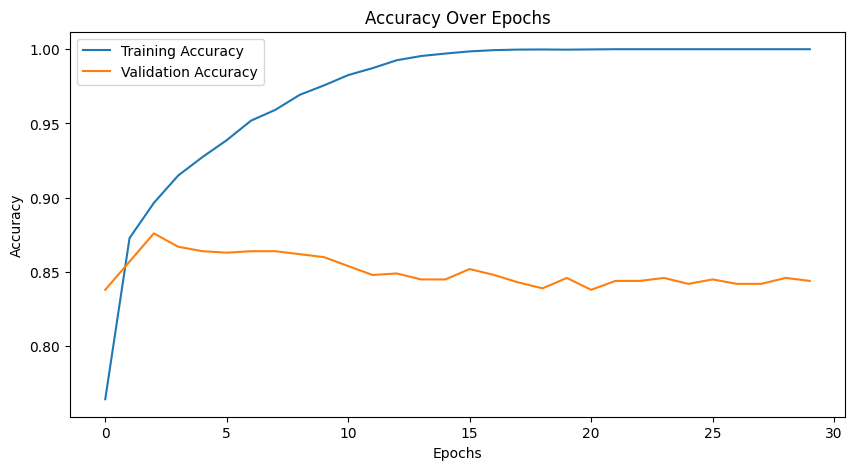

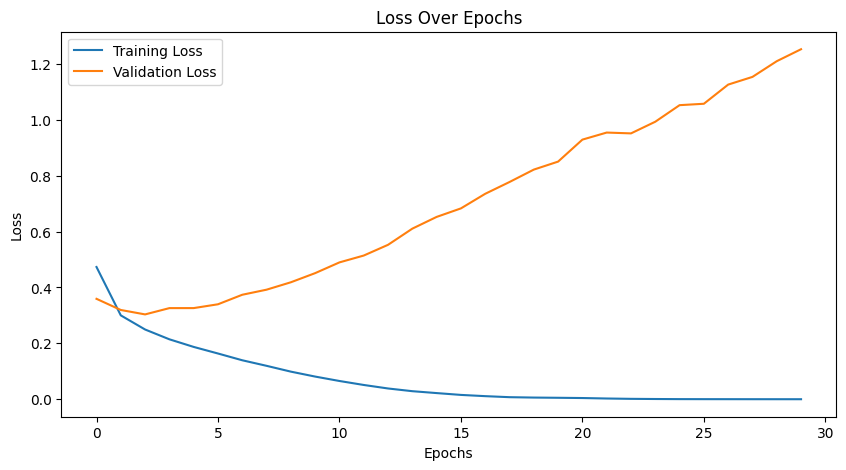

In [11]:
import matplotlib.pyplot as plt

history_dict = history.history

# Plot accuracy
plt.figure(figsize=(10,5))
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(10,5))
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
